<a href="https://colab.research.google.com/github/llukitas/Interbank_Kaggle/blob/master/Paso1_Sistema_de_Recomendador_Peliculas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Instalacion de utilitarios Pyspark

#  **03/11/2019**

In [0]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://www-us.apache.org/dist/spark/spark-2.3.4/spark-2.3.4-bin-hadoop2.7.tgz
!tar xf spark-2.3.4-bin-hadoop2.7.tgz

In [0]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://www-us.apache.org/dist/spark/spark-2.4.4/spark-2.4.4-bin-hadoop2.7.tgz
!tar xf spark-2.4.4-bin-hadoop2.7.tgz


In [0]:
!pip install -q findspark

In [0]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.4-bin-hadoop2.7"


In [5]:
!pip install pyspark

     |████████████████████████████████| 215.7MB 52kB/s 
     |████████████████████████████████| 204kB 37.6MB/s 
  Created wheel for pyspark: filename=pyspark-2.4.4-py2.py3-none-any.whl size=216130387 sha256=f25206dff98a428266851db872048ab6710a91255826e073b69ed734ea4c2f90
  Stored in directory: /root/.cache/pip/wheels/ab/09/4d/0d184230058e654eb1b04467dbc1292f00eaa186544604b471
Successfully built pyspark


In [0]:
from pyspark.sql import SparkSession
from pyspark import SparkContext
spark = SparkSession.builder.master("local").getOrCreate()
sc = SparkContext.getOrCreate()

# 1. Lectura del origen datos

In [7]:
# Lectura desde un archivo fisico
from google.colab import files
uploaded = files.upload()

MessageError: ignored

In [8]:

# Conexion al drive
#---------------------------
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [9]:
ls

drive/        spark-2.3.4-bin-hadoop2.7/     spark-2.4.4-bin-hadoop2.7/
sample_data/  spark-2.3.4-bin-hadoop2.7.tgz  spark-2.4.4-bin-hadoop2.7.tgz


#2.  Cargando los datos en formato Spark

In [10]:
DS_peliculas_rating = spark.read.csv('/content/drive/My Drive/AGRARIA_ML/ML Sesion 3 Machine Lear2da y Sistema Recomendador/Puntaje_peliculas.csv', sep=',', header=True, inferSchema=True)

# 2.1 Revision de formatos 
DS_peliculas_rating.printSchema()

root
 |-- userId: integer (nullable = true)
 |-- title: string (nullable = true)
 |-- rating: integer (nullable = true)



In [11]:
# Dimensiona de base
print((DS_peliculas_rating.count(),len(DS_peliculas_rating.columns)))

(100000, 3)


In [12]:
# 2.2 Revisiones  
DS_peliculas_rating.show(5)

+------+------------+------+
|userId|       title|rating|
+------+------------+------+
|   196|Kolya (1996)|     3|
|    63|Kolya (1996)|     3|
|   226|Kolya (1996)|     5|
|   154|Kolya (1996)|     3|
|   306|Kolya (1996)|     5|
+------+------------+------+
only showing top 5 rows



In [13]:
# 2.3 Validacion de carga del total de registros
print(DS_peliculas_rating.count())

100000


In [14]:
# 2.4 Exploracion inicial
DS_peliculas_rating.describe().show()

+-------+------------------+--------------------+------------------+
|summary|            userId|               title|            rating|
+-------+------------------+--------------------+------------------+
|  count|            100000|              100000|            100000|
|   mean|         462.48475|                null|           3.52986|
| stddev|266.61442012750865|                null|1.1256735991443156|
|    min|                 1|'Til There Was Yo...|                 1|
|    max|               943|             unknown|                 5|
+-------+------------------+--------------------+------------------+



In [16]:
# 2.5 Los clientes que más vistaron la plataforma de videos
DS_peliculas_rating.groupBy('userId').count().orderBy('count',ascending=False).show(10,False)

+------+-----+
|userId|count|
+------+-----+
|405   |737  |
|655   |685  |
|13    |636  |
|450   |540  |
|276   |518  |
|416   |493  |
|537   |490  |
|303   |484  |
|234   |480  |
|393   |448  |
+------+-----+
only showing top 10 rows



In [17]:
# 2.6  Las clientes que menos vieron las peliculas
DS_peliculas_rating.groupBy('userId').count().orderBy('count',ascending=True).show(10,False)

+------+-----+
|userId|count|
+------+-----+
|732   |20   |
|631   |20   |
|572   |20   |
|926   |20   |
|93    |20   |
|596   |20   |
|636   |20   |
|34    |20   |
|300   |20   |
|685   |20   |
+------+-----+
only showing top 10 rows



In [18]:
# 2.7  Las peliculas con mayor numero de visualizaciones
DS_peliculas_rating.groupBy('title').count().orderBy('count',ascending=False).show(10,False)

+-----------------------------+-----+
|title                        |count|
+-----------------------------+-----+
|Star Wars (1977)             |583  |
|Contact (1997)               |509  |
|Fargo (1996)                 |508  |
|Return of the Jedi (1983)    |507  |
|Liar Liar (1997)             |485  |
|English Patient, The (1996)  |481  |
|Scream (1996)                |478  |
|Toy Story (1995)             |452  |
|Air Force One (1997)         |431  |
|Independence Day (ID4) (1996)|429  |
+-----------------------------+-----+
only showing top 10 rows



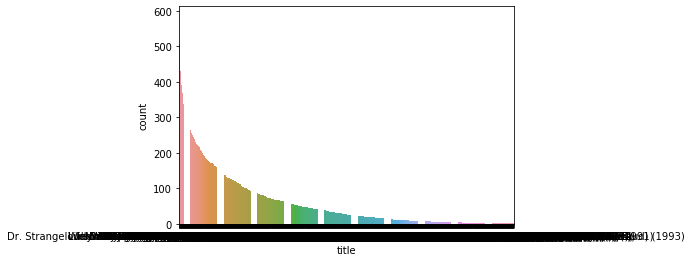

In [19]:
#Graficas
res= DS_peliculas_rating.groupBy('title').count().orderBy('count',ascending=False)
red=res.toPandas()

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ax=sns.barplot(x="title", y="count", data=red)



In [20]:
# Peliculas con menos numero de visualizaciones 
DS_peliculas_rating.groupBy('title').count().orderBy('count',ascending=True).show(10,False)

+------------------------------------------+-----+
|title                                     |count|
+------------------------------------------+-----+
|Tigrero: A Film That Was Never Made (1994)|1    |
|Leopard Son, The (1996)                   |1    |
|Aiqing wansui (1994)                      |1    |
|Fear, The (1995)                          |1    |
|Mad Dog Time (1996)                       |1    |
|Target (1995)                             |1    |
|Lashou shentan (1992)                     |1    |
|Vie est belle, La (Life is Rosey) (1987)  |1    |
|Modern Affair, A (1995)                   |1    |
|Next Step, The (1995)                     |1    |
+------------------------------------------+-----+
only showing top 10 rows



In [23]:
# El cliente 100 y el 450 cold celd
DS_peliculas_rating.filter((DS_peliculas_rating['title']=='Star Wars (1977)')&(DS_peliculas_rating['userId']=='450')).show()
#DS_peliculas_rating.filter((DS_peliculas_rating['title']=='Star Wars (1977)')&(DS_peliculas_rating['userId']=='100')).show()

+------+----------------+------+
|userId|           title|rating|
+------+----------------+------+
|   450|Star Wars (1977)|     5|
+------+----------------+------+



# 3. FEature Engineering: Tansforma pelicula a numero



In [0]:
# Importando el codifocador
from pyspark.ml.feature import StringIndexer,IndexToString

In [0]:
# Configurando la Numerzación los titulos de las peliculas
# title_new = La codificación de las peliculas
stringIndexer = StringIndexer(inputCol="title", outputCol="title_new")

In [0]:
#Aplicando la numerización de peliculas
model = stringIndexer.fit(DS_peliculas_rating)

In [0]:
#Creando un nuevo Dataframe con el indexado creado
indexed = model.transform(DS_peliculas_rating)

In [28]:
#Revision de los indices
indexed.show(10)

+------+------------+------+---------+
|userId|       title|rating|title_new|
+------+------------+------+---------+
|   196|Kolya (1996)|     3|    287.0|
|    63|Kolya (1996)|     3|    287.0|
|   226|Kolya (1996)|     5|    287.0|
|   154|Kolya (1996)|     3|    287.0|
|   306|Kolya (1996)|     5|    287.0|
|   296|Kolya (1996)|     4|    287.0|
|    34|Kolya (1996)|     5|    287.0|
|   271|Kolya (1996)|     4|    287.0|
|   201|Kolya (1996)|     4|    287.0|
|   209|Kolya (1996)|     4|    287.0|
+------+------------+------+---------+
only showing top 10 rows



In [30]:
#Numero de veces que cada titulo ha aparecido
indexed.groupBy('title_new').count().orderBy('count',ascending=False).show(10,False)

+---------+-----+
|title_new|count|
+---------+-----+
|0.0      |583  |
|1.0      |509  |
|2.0      |508  |
|3.0      |507  |
|4.0      |485  |
|5.0      |481  |
|6.0      |478  |
|7.0      |452  |
|8.0      |431  |
|9.0      |429  |
+---------+-----+
only showing top 10 rows



# 4. Dividiendo la data en muestra de entrenamiento y validacion


In [0]:
#4.1  Data de entrenamiento y validacion
train,test=indexed.randomSplit([0.75,0.25],seed=3456)

In [32]:
# Nro de entrenamiento
train.count()

74870

In [33]:
# Nro de Validacion
test.count()

25130

# 5. Entrenando el Modelo


In [0]:
#Importando el modelo Recomendador ALS
from pyspark.sql.functions import *
from pyspark.ml.recommendation import ALS


In [0]:
#Configuracion del Entrenamiento del modelo Recomendador usando la muetsra de entrenamiento
rec=ALS(maxIter=10,regParam=0.01,userCol='userId',itemCol='title_new',ratingCol='rating',nonnegative=True,coldStartStrategy="drop",implicitPrefs=False)

# maxIter: El maximo de iteraciones
# regParam: Parametro de REgularización
# nonnegative: Especificar si se utiliza una restriccion negativa en los Minimos cuadrados
# coldStartStrategy: Parametro que elimina cualquier cliente que no tenga informacion
# implicitPrefs: Si es implicito hace referencia a feedback no registrado voluntariamente por el cliente

In [0]:
#Entrenando el modelo
rec_model=rec.fit(train)

In [0]:
#Haciendo las predicciones en la data de test 
predicted_ratings=rec_model.transform(test)

In [38]:
#Revisando los pronostico
predicted_ratings.printSchema()

root
 |-- userId: integer (nullable = true)
 |-- title: string (nullable = true)
 |-- rating: integer (nullable = true)
 |-- title_new: double (nullable = false)
 |-- prediction: float (nullable = false)



In [39]:
# Revision rapida de los pronosticos
predicted_ratings.orderBy(rand()).show(10)

+------+--------------------+------+---------+----------+
|userId|               title|rating|title_new|prediction|
+------+--------------------+------+---------+----------+
|   767| Pulp Fiction (1994)|     4|     12.0| 4.8266177|
|   805|    Pest, The (1997)|     1|   1197.0| 3.1972163|
|    54|Good Will Hunting...|     5|    120.0| 4.5003376|
|   462|Starship Troopers...|     1|    105.0|  3.613918|
|   178|Beauty and the Be...|     4|    114.0| 4.0802574|
|   293|       Batman (1989)|     3|    116.0| 2.9687803|
|   293|   Just Cause (1995)|     3|    810.0| 1.8428452|
|   435|    True Lies (1994)|     5|    109.0| 3.2942538|
|   855|City of Lost Chil...|     3|    346.0| 4.4072495|
|   373|Magnificent Seven...|     3|    277.0|  4.354458|
+------+--------------------+------+---------+----------+
only showing top 10 rows



In [0]:
# Generando los top 10 peliculas sugeridas por cada cliente
userRecs = rec_model.recommendForAllUsers(10)

In [41]:
userRecs.show(5,False)

+------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|userId|recommendations                                                                                                                                                                        |
+------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|471   |[[853, 15.30879], [1013, 13.638046], [986, 13.492773], [850, 12.889257], [892, 11.849178], [1308, 11.139972], [1149, 11.012086], [979, 10.592531], [1093, 10.469082], [517, 10.438666]]|
|463   |[[1264, 7.5872555], [1308, 6.3489814], [853, 6.167529], [1007, 5.7179213], [961, 5.513595], [908, 5.494619], [1023, 5.3968697], [1188, 5.251069], [1110, 5.20813], [524, 4.972508]]    |
|833   |[[924, 6.456631], [462, 5.4

# 5. Evaluación del poder predictivo del modelo


In [42]:
# Creando la columna diferencia del pronostico
predicted_ratings_witherr=predicted_ratings.withColumn('err',abs(predicted_ratings.prediction - predicted_ratings.rating))

predicted_ratings_witherr.show()

+------+--------------------+------+---------+----------+-----------+
|userId|               title|rating|title_new|prediction|        err|
+------+--------------------+------+---------+----------+-----------+
|   251|That Thing You Do...|     4|    148.0| 3.3354273|  0.6645727|
|   193|That Thing You Do...|     4|    148.0| 3.2146358| 0.78536415|
|   731|That Thing You Do...|     2|    148.0|  4.502713|  2.5027132|
|   501|That Thing You Do...|     3|    148.0| 3.1859837| 0.18598366|
|   577|That Thing You Do...|     4|    148.0| 3.9442601| 0.05573988|
|   271|That Thing You Do...|     1|    148.0| 3.4820166|  2.4820166|
|   388|That Thing You Do...|     4|    148.0|  4.464457| 0.46445704|
|   222|That Thing You Do...|     3|    148.0| 3.5011287|  0.5011287|
|    93|That Thing You Do...|     4|    148.0| 3.7696986| 0.23030138|
|   599|That Thing You Do...|     5|    148.0| 4.5787625| 0.42123747|
|   305|That Thing You Do...|     3|    148.0| 3.0462883|0.046288252|
|   435|That Thing Y

In [43]:
# Distribución de las valoraciones
predicted_ratings.groupBy('rating').count().orderBy('rating',ascending=True).show()

+------+-----+
|rating|count|
+------+-----+
|     1| 1439|
|     2| 2871|
|     3| 6861|
|     4| 8652|
|     5| 5257|
+------+-----+



In [44]:
# Error promedio por rating de valoracion
predicted_ratings_witherr.groupBy('rating').agg({'err':'mean'}).orderBy('rating',ascending=True).show()

+------+------------------+
|rating|          avg(err)|
+------+------------------+
|     1|1.5510310886467886|
|     2|1.0448862407233233|
|     3|0.6286513952033684|
|     4|0.5701062388294448|
|     5|0.9535937997263966|
+------+------------------+



In [45]:
# Error promedio por rating de valoracion
predicted_ratings_witherr.groupBy('rating').agg({'err':'std'}).orderBy('rating',ascending=True).show()

+------+-------------------+
|rating|        stddev(err)|
+------+-------------------+
|     1| 0.9224341849979457|
|     2| 0.7070969888922201|
|     3|0.48689751102256335|
|     4|0.48706738704918373|
|     5|  0.629706873582781|
+------+-------------------+



In [0]:
#Importando el evaluador de Regresion RMSE 
from pyspark.ml.evaluation import RegressionEvaluator

In [0]:
#Evluando la presición del pronostico
evaluator=RegressionEvaluator(metricName='rmse',predictionCol='prediction',labelCol='rating')

In [0]:
#Evluando el error de pronostico global
rmse=evaluator.evaluate(predicted_ratings)

In [49]:
#Imprimiento el error
print(rmse)

1.0048051127541002


# 6. Recomendandor de peliculas, ya listo!

In [0]:
#Listado de peliculas unicas
unique_movies=indexed.select('title_new').distinct()

In [51]:
#Total de peliculas
unique_movies.count()

1664

In [0]:
#Asignando un alias {a} la lista unica de peliculas
a = unique_movies.alias('a')

In [53]:
# Eligiendo un cliente
user_id=100

# Creando una tabla que contiene una pelicula por usuario
watched_movies=indexed.filter(indexed['userId'] == user_id).select('title_new').distinct()

#Numero de peliculas ya evaluadas 
watched_movies.count()

59

In [0]:
# Asignando un alias  {b} ha peliculas que el usuario ya vio de la tabla
b=watched_movies.alias('b')

In [0]:
#Cruzando ambas tablas
total_movies = a.join(b, a.title_new == b.title_new,how='left')

In [56]:
total_movies.show(10,False)

+---------+---------+
|title_new|title_new|
+---------+---------+
|558.0    |null     |
|305.0    |null     |
|299.0    |null     |
|596.0    |null     |
|769.0    |null     |
|934.0    |null     |
|496.0    |null     |
|1051.0   |null     |
|692.0    |null     |
|810.0    |null     |
+---------+---------+
only showing top 10 rows



In [0]:
# Seleccionando peliculas que el cliente aun no ha mirado
remaining_movies=total_movies.where(col("b.title_new").isNull()).select(a.title_new).distinct()

In [58]:
remaining_movies.show()

+---------+
|title_new|
+---------+
|    558.0|
|    305.0|
|    299.0|
|    596.0|
|    769.0|
|    934.0|
|    496.0|
|   1051.0|
|    692.0|
|    810.0|
|    720.0|
|    782.0|
|    184.0|
|    147.0|
|    576.0|
|    170.0|
|   1369.0|
|   1587.0|
|    608.0|
|    735.0|
+---------+
only showing top 20 rows



In [59]:
# Numero de peliculas que los usuario aun no lo ven 
remaining_movies.count()

1605

In [0]:
# Agregando una nueva columna del usuario 
remaining_movies=remaining_movies.withColumn("userId",lit(int(user_id)))

In [61]:
remaining_movies.show(10,False)

+---------+------+
|title_new|userId|
+---------+------+
|558.0    |100   |
|305.0    |100   |
|299.0    |100   |
|596.0    |100   |
|769.0    |100   |
|934.0    |100   |
|496.0    |100   |
|1051.0   |100   |
|692.0    |100   |
|810.0    |100   |
+---------+------+
only showing top 10 rows



In [0]:
# Haciendo la recomendacion de peliculas utilizando el modelo recomendador ALS y seleccionado solo las mejores top {n} peliculas
recommendations=rec_model.transform(remaining_movies).orderBy('prediction',ascending=False)

In [63]:
recommendations.show(5,False)

+---------+------+----------+
|title_new|userId|prediction|
+---------+------+----------+
|853.0    |100   |6.5949626 |
|1072.0   |100   |6.275746  |
|1013.0   |100   |5.3618693 |
|1132.0   |100   |5.155148  |
|883.0    |100   |4.979104  |
+---------+------+----------+
only showing top 5 rows



In [0]:
# Consiguiendo los de las peliculas sugeridas
movie_title = IndexToString(inputCol="title_new", outputCol="title",labels=model.labels)

final_recommendations=movie_title.transform(recommendations)

In [65]:
final_recommendations.show(10,False)

+---------+------+----------+--------------------------------------------+
|title_new|userId|prediction|title                                       |
+---------+------+----------+--------------------------------------------+
|853.0    |100   |6.5949626 |Naked (1993)                                |
|1072.0   |100   |6.275746  |Radioland Murders (1994)                    |
|1013.0   |100   |5.3618693 |War, The (1994)                             |
|1132.0   |100   |5.155148  |Incognito (1997)                            |
|883.0    |100   |4.979104  |Inventing the Abbotts (1997)                |
|851.0    |100   |4.9431586 |Halloween: The Curse of Michael Myers (1995)|
|1233.0   |100   |4.88201   |Man of No Importance, A (1994)              |
|892.0    |100   |4.8429766 |Welcome To Sarajevo (1997)                  |
|700.0    |100   |4.780497  |Basketball Diaries, The (1995)              |
|930.0    |100   |4.7306404 |Ma vie en rose (My Life in Pink) (1997)     |
+---------+------+-------

# 7. Construyendo las funcion que sugiera una pelicula recomendada segun el modelo recomendador

In [0]:
# Funcion para recomendar las top n peliculas para cualquier usuario
def top_movies(user_id,n):
    """
    This function returns the top 'n' movies that user has not seen yet but might like 
    
    """
    # Asignación de una lista de peliculas unicas a
    a = unique_movies.alias('a')
    
    # Creando otra tabla que contiene las peliculas que ya vio el usuario
    watched_movies=indexed.filter(indexed['userId'] == user_id).select('title_new')
    
    # Asignanción de tabla de peliculas b de peliculas ya vistas 
    b=watched_movies.alias('b')
    
    # Cruce de ambas tablas
    total_movies = a.join(b, a.title_new == b.title_new,how='left')
    
    # Seleccionando peliculas que el usuario no ha visto aun 
    remaining_movies=total_movies.where(col("b.title_new").isNull()).select(a.title_new).distinct()
        
    #Agregando una nueva columan del cliente  
    remaining_movies=remaining_movies.withColumn("userId",lit(int(user_id)))
    
    # REalizando la recomendnado de peliculas mas adecuada utilizando el Sistema de recomendador del modelo ALS y seleccionando las mejores peliculas
    recommendations=rec_model.transform(remaining_movies).orderBy('prediction',ascending=False).limit(n)

    # Agregando los titulos de las peliculas en texto   
    movie_title = IndexToString(inputCol="title_new", outputCol="title",labels=model.labels)
    final_recommendations=movie_title.transform(recommendations)
    
    # Entregando los titutlos recomendado por usuario
    return final_recommendations.show(n,False)


In [67]:
# REvision del clientes y las 10 peliculas sugeridas para el cliente
top_movies(402,10)

+---------+------+----------+---------------------------------------------------+
|title_new|userId|prediction|title                                              |
+---------+------+----------+---------------------------------------------------+
|1057.0   |402   |6.10757   |Boys of St. Vincent, The (1993)                    |
|1432.0   |402   |5.774143  |Boys, Les (1997)                                   |
|47.0     |402   |5.5253663 |Shawshank Redemption, The (1994)                   |
|82.0     |402   |5.4308147 |It's a Wonderful Life (1946)                       |
|36.0     |402   |5.3533115 |Schindler's List (1993)                            |
|1375.0   |402   |5.3417935 |C'est arriv<U+008E> pr<U+008F>s de chez vous (1992)|
|261.0    |402   |5.307897  |My Fair Lady (1964)                                |
|768.0    |402   |5.2848053 |Fast, Cheap & Out of Control (1997)                |
|1290.0   |402   |5.279434  |N<U+008E>nette et Boni (1996)                      |
|230.0    |402  

In [68]:
# El cliente 450 que revisa Star Wars
DS_peliculas_rating.filter((DS_peliculas_rating['rating']>4)&(DS_peliculas_rating['userId']=='450')).show()

+------+--------------------+------+
|userId|               title|rating|
+------+--------------------+------+
|   450|L.A. Confidential...|     5|
|   450|Dr. Strangelove o...|     5|
|   450|Hunt for Red Octo...|     5|
|   450|Age of Innocence,...|     5|
|   450|     Die Hard (1988)|     5|
|   450|Right Stuff, The ...|     5|
|   450|Sleepless in Seat...|     5|
|   450|   Sting, The (1973)|     5|
|   450|  Rear Window (1954)|     5|
|   450|Dead Poets Societ...|     5|
|   450|Sound of Music, T...|     5|
|   450|E.T. the Extra-Te...|     5|
|   450|Brothers McMullen...|     5|
|   450|To Kill a Mocking...|     5|
|   450|   Old Yeller (1957)|     5|
|   450|Jerry Maguire (1996)|     5|
|   450|     Backbeat (1993)|     5|
|   450|  Taxi Driver (1976)|     5|
|   450|Young Frankenstei...|     5|
|   450|It's a Wonderful ...|     5|
+------+--------------------+------+
only showing top 20 rows



In [69]:
# REvision del clientes y las 10 peliculas sugeridas para el cliente
top_movies(450,15)

+---------+------+----------+----------------------------------------------------+
|title_new|userId|prediction|title                                               |
+---------+------+----------+----------------------------------------------------+
|1072.0   |450   |5.4741545 |Radioland Murders (1994)                            |
|892.0    |450   |5.080003  |Welcome To Sarajevo (1997)                          |
|853.0    |450   |4.9881797 |Naked (1993)                                        |
|1213.0   |450   |4.959093  |Aparajito (1956)                                    |
|850.0    |450   |4.929431  |Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)|
|698.0    |450   |4.89843   |Charade (1963)                                      |
|1341.0   |450   |4.8924117 |Best Men (1997)                                     |
|1271.0   |450   |4.8558726 |Whole Wide World, The (1996)                        |
|1028.0   |450   |4.801185  |To Live (Huozhe) (1994)                             |
|101